# Plot model fits for simulation analysis 2

In [1]:
import os
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from psifr import fr
from mindstorm import statplot
from cymr import network
from cfr import framework
from cfr import figures

res_dir = Path(os.environ['CFR_RESULTS'])
fit_dir = Path(os.environ['CFR_FITS'])
fig_dir = Path(os.environ['CFR_FIGURES']) / 'sim2'

data_file = res_dir / 'cfr_eeg_mixed.csv'
patterns_file = res_dir / 'cfr_patterns.hdf5'
os.makedirs(fig_dir, exist_ok=True)
figures.set_style()

## Read observed and simulated data

In [2]:
patterns = network.load_patterns(patterns_file)
rsm = patterns['similarity']['use']

In [3]:
models = [
    'cmrs_fcf-loc-cat-use',
    'cmrs_fcf-loc-cat-use_sl-B_enc-B_rec',
    'cmrs_fcf-loc-cat-use_sl-B_enc-B_rec_fix-B_rec_cat1-B_rec_use1',
]
model_names = [
    'DCMR',
    'DCMR variable',
    'DCMR restricted',
]
data = framework.read_model_sims(data_file, fit_dir, models, model_names)

In [4]:
# for speed, omit simulation replications; comment out for final
# data = data.loc[data['list'] <= 48]

In [5]:
models2 = [
    'cmrs_fcf-loc',
    'cmrs_fcf-loc-cat',
    'cmrs_fcf-loc-use',
    'cmrs_fcf-loc-cat-use',
]
model_names2 = [
    'I',
    'IC',
    'ID',
    'ICD',
]
data2 = framework.read_model_sims(data_file, fit_dir, models2, model_names2)

In [6]:
# for speed, omit simulation replications; comment out for final
# data2 = data2.loc[data2['list'] <= 48]

## Set colors

In [7]:
curve = sns.color_palette(
    'ch:rot=-.5, light=.6, dark=.3, gamma=1', n_colors=len(models)
)
curve.insert(len(models), (.3, .3, .3))
curve

[(0.44163916703794076, 0.6914342033666265, 0.5414714890673176),
 (0.27424883716016524, 0.5352555384607786, 0.4809527643729599),
 (0.17051215858853222, 0.344636926092434, 0.3959064384004337),
 (0.3, 0.3, 0.3)]

In [8]:
dark = sns.color_palette(
    'ch:rot=-.5, light=.7, dark=.3, gamma=.6', n_colors=len(models)
)
dark.insert(len(models), (.6, .6, .6))
dark

[(0.725301473503126, 0.8645990769601404, 0.7363315007817791),
 (0.5016677447743987, 0.7426793533080586, 0.6602162691374847),
 (0.33145894574681245, 0.5393097642399239, 0.6005096167923277),
 (0.6, 0.6, 0.6)]

In [9]:
light = sns.color_palette(
    'ch:rot=-.5, light=.7, dark=.3, gamma=.2', n_colors=len(models)
)
light.insert(len(models), (.85, .85, .85))
light

[(0.8973525746116884, 0.9546730560357413, 0.901891392639006),
 (0.7912737188119296, 0.9119907090651371, 0.870686908851388),
 (0.6820851323976215, 0.8225675908928259, 0.8639314200489312),
 (0.85, 0.85, 0.85)]

In [10]:
curve2 = sns.color_palette(
    'ch:rot=-.5, light=.6, dark=.3, gamma=1', n_colors=len(models2)
)
curve2.insert(len(models2), (.3, .3, .3))
curve2

[(0.44163916703794076, 0.6914342033666265, 0.5414714890673176),
 (0.3237814498768263, 0.5927867044161492, 0.5007454824917508),
 (0.2328219480554011, 0.4740934551530011, 0.4585285109326825),
 (0.17051215858853222, 0.344636926092434, 0.3959064384004337),
 (0.3, 0.3, 0.3)]

In [11]:
dark2 = sns.color_palette(
    'ch:rot=-.5, light=.7, dark=.3, gamma=.6', n_colors=len(models2)
)
dark2.insert(len(models2), (.6, .6, .6))
dark2

[(0.725301473503126, 0.8645990769601404, 0.7363315007817791),
 (0.5726480212561199, 0.7903330615780247, 0.6781127074715647),
 (0.434142969265212, 0.6825746803726097, 0.6442133332843847),
 (0.33145894574681245, 0.5393097642399239, 0.6005096167923277),
 (0.6, 0.6, 0.6)]

In [12]:
light2 = sns.color_palette(
    'ch:rot=-.5, light=.7, dark=.3, gamma=.2', n_colors=len(models2)
)
light2.insert(len(models2), (.85, .85, .85))
light2

[(0.8973525746116884, 0.9546730560357413, 0.901891392639006),
 (0.8280152843984974, 0.9293987580038842, 0.8771338467738101),
 (0.7524272591968628, 0.8882868851933822, 0.8673082498778775),
 (0.6820851323976215, 0.8225675908928259, 0.8639314200489312),
 (0.85, 0.85, 0.85)]

In [13]:
opt = {'height': 4, 'aspect': 1, 'palette': curve}
opt2 = {'height': 4, 'aspect': 1, 'palette': curve2}

## Serial position effects

In [14]:
spc = data.groupby('source').apply(fr.spc)

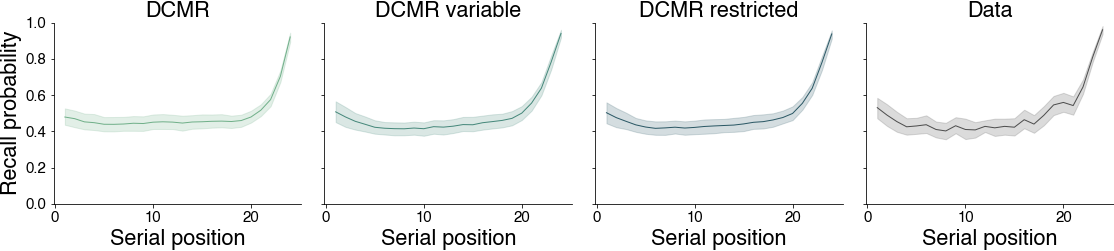

In [15]:
g = fr.plot_spc(spc, hue='source', col='source', **opt)
g.set_titles('{col_name}')
g.savefig(fig_dir / 'spc.pdf');

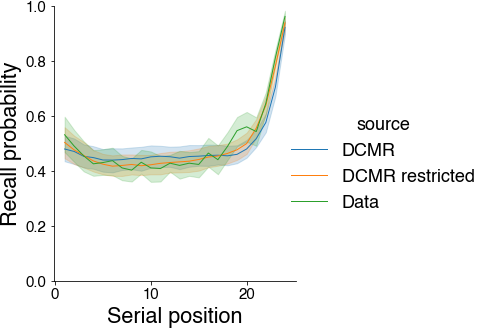

In [49]:
g = fr.plot_spc(
    spc.query('source in ["DCMR", "DCMR restricted", "Data"]'), hue='source', height=5
).add_legend()
g.savefig(fig_dir / 'spc_comp.pdf');

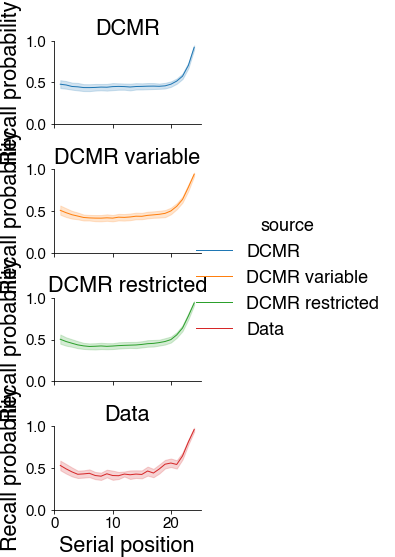

In [52]:
g = fr.plot_spc(
    spc, row='source', hue='source', height=2, aspect=2
).add_legend()
g.set_titles('{row_name}')
g.savefig(fig_dir / 'spc_comp_stack.pdf');

In [40]:
pnr = data.groupby('source').apply(fr.pnr)

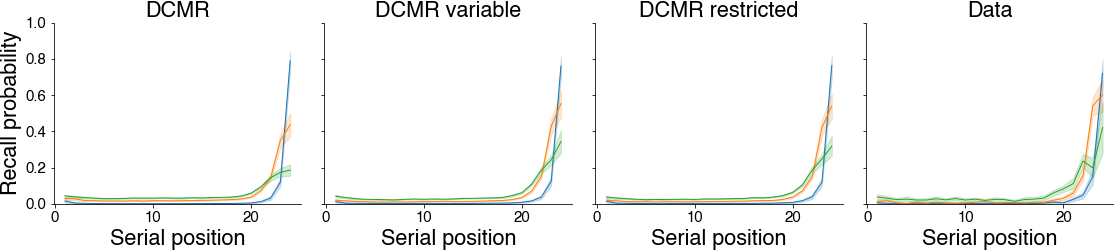

In [47]:
g = fr.plot_spc(
    pnr.query('output <= 3'), hue='output', col='source', height=4, aspect=1
)
g.set_titles('{col_name}')
g.savefig(fig_dir / 'pnr.pdf');

## Clustering measures

In [17]:
lag_rank_within = data.groupby('source').apply(
    fr.lag_rank, test_key='category', test=lambda x, y: x == y
)

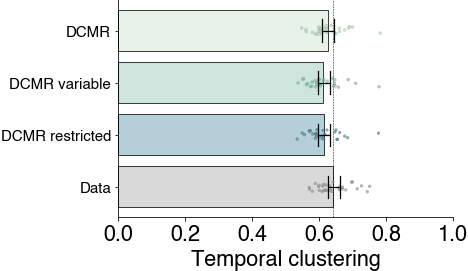

In [39]:
fig, ax = plt.subplots(figsize=(6, 4))
statplot.plot_swarm_bar(
    lag_rank_within,
    y='source',
    x='rank',
    dark=dark,
    light=light,
    point_kind='strip',
    ax=ax,
)
m = lag_rank_within.loc['Data', 'rank'].mean()
ax.axline([m, 0], slope=np.inf, linestyle='--', linewidth=.5, color='k')
ax.set(xlim=(0, 1), xlabel='Temporal clustering', ylabel='');
fig.savefig(fig_dir / 'comp_lag_rank.pdf')

In [19]:
cat_crp = data.groupby('source').apply(
    fr.category_crp, category_key='category'
)

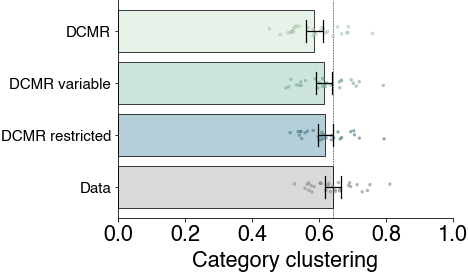

In [38]:
fig, ax = plt.subplots(figsize=(6, 4))
statplot.plot_swarm_bar(
    cat_crp,
    y='source',
    x='prob',
    dark=dark,
    light=light,
    point_kind='strip',
    ax=ax,
)
m = cat_crp.loc['Data', 'prob'].mean()
ax.axline([m, 0], slope=np.inf, linestyle='--', linewidth=.5, color='k')
ax.set(xlim=(0, 1), xlabel='Category clustering', ylabel='');
fig.savefig(fig_dir / 'comp_cat_crp.pdf')

In [21]:
use_rank = data.groupby('source').apply(
    fr.distance_rank, 'item_index', 1 - rsm, test_key='category',
    test=lambda x, y: x == y
)

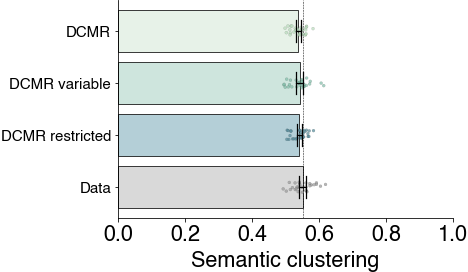

In [22]:
fig, ax = plt.subplots(figsize=(6, 4))
statplot.plot_swarm_bar(
    use_rank,
    y='source',
    x='rank',
    dark=dark,
    light=light,
    point_kind='strip',
    ax=ax,
)
m = use_rank.loc['Data', 'rank'].mean()
ax.axline([m, 0], slope=np.inf, linestyle='--', linewidth=.5, color='k')
ax.set(xlim=(0, 1), xlabel='Semantic clustering', ylabel='');
fig.savefig(fig_dir / 'comp_use_rank.pdf')

## Shifted distance rank

In [33]:
distances = 1 - rsm
max_shift = 3
dist_rank = data.groupby('source').apply(
    fr.distance_rank_shifted, 
    'item_index', 
    distances, 
    max_shift, 
    test_key='category', 
    test=lambda x, y: x == y,
)

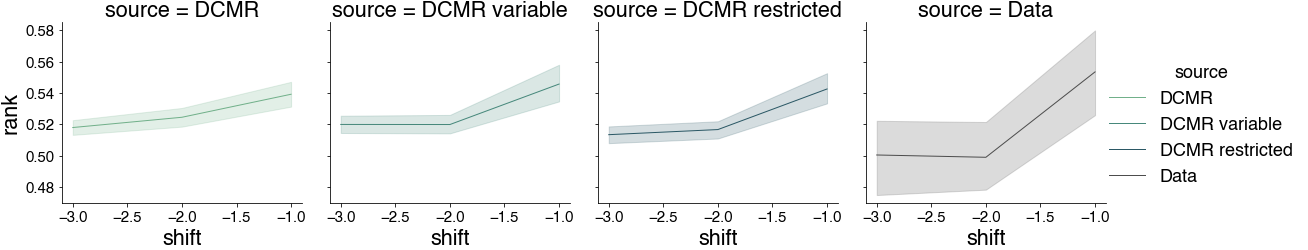

In [34]:
g = sns.relplot(
    data=dist_rank.reset_index(), 
    x='shift', 
    y='rank', 
    hue='source', 
    col='source', 
    kind='line',
    **opt,
)
g.savefig(fig_dir / 'use_rank_shifted.pdf')

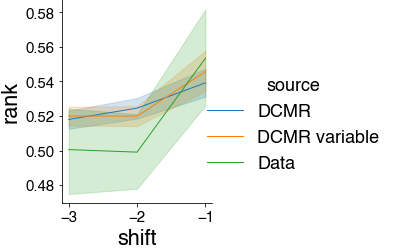

In [50]:
g = sns.relplot(
    data=dist_rank.query('source in ["DCMR", "DCMR variable", "Data"]').reset_index(), 
    x='shift', 
    y='rank', 
    hue='source', 
    kind='line', 
    height=4,
)
g.savefig(fig_dir / 'use_rank_shifted_comp.pdf')

In [36]:
distances = 1 - rsm
max_shift = 4
dist_rank2 = data2.groupby('source').apply(
    fr.distance_rank_shifted, 
    'item_index', 
    distances, 
    max_shift, 
    test_key='category', 
    test=lambda x, y: x == y,
)

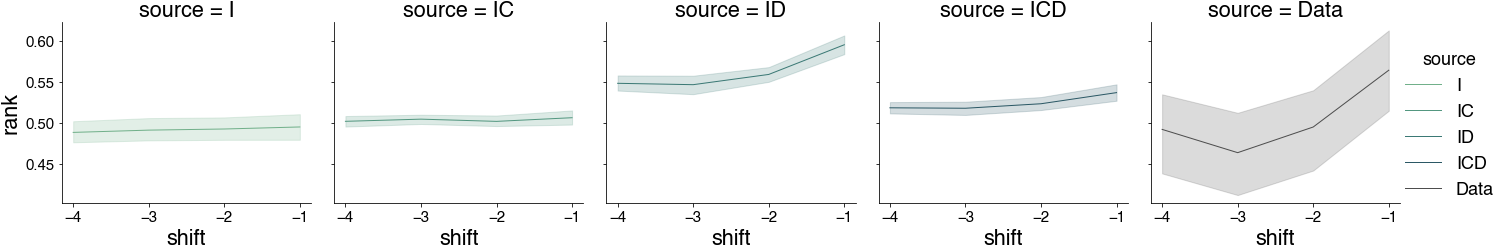

In [37]:
sns.relplot(
    data=dist_rank2.reset_index(), 
    x='shift', 
    y='rank', 
    hue='source', 
    col='source', 
    kind='line',
    **opt2,
)
g.savefig(fig_dir / 'use_rank_shifted_icd.pdf')

## Compound lag-CRP

In [28]:
crp = data.groupby('source').apply(
    fr.lag_crp_compound, test_key='category', test=lambda x, y: x == y
)
binned = crp.reset_index()
binned.loc[binned['previous'].abs() > 3, 'Previous'] = '|Lag|>3'
binned.loc[binned['previous'] == 1, 'Previous'] = 'Lag=+1'
binned.loc[binned['previous'] == -1, 'Previous'] = 'Lag=-1'
summed = binned.groupby(
    ['source', 'subject', 'Previous', 'current']
)[['actual', 'possible']].sum()
summed['prob'] = summed['actual'] / summed['possible']

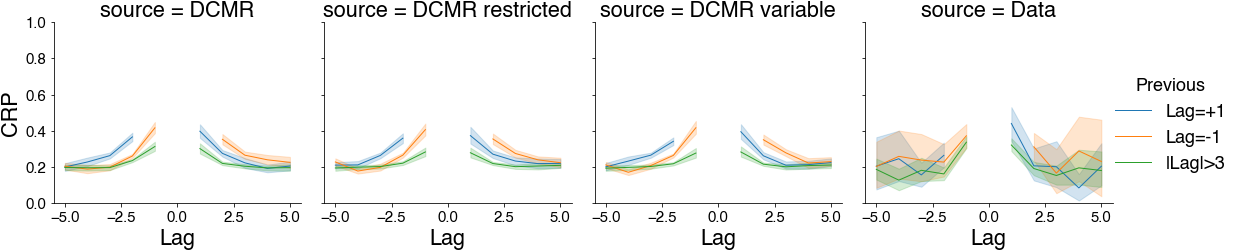

In [29]:
g = fr.plot_lag_crp(
    summed, lag_key='current', hue='Previous', col='source', height=4
).add_legend()
g.savefig(fig_dir / 'lag_crp_compound.pdf');

In [30]:
crp = data2.groupby('source').apply(
    fr.lag_crp_compound, test_key='category', test=lambda x, y: x == y
)
binned = crp.reset_index()
binned.loc[binned['previous'].abs() > 3, 'Previous'] = '|Lag|>3'
binned.loc[binned['previous'] == 1, 'Previous'] = 'Lag=+1'
binned.loc[binned['previous'] == -1, 'Previous'] = 'Lag=-1'
summed = binned.groupby(
    ['source', 'subject', 'Previous', 'current']
)[['actual', 'possible']].sum()
summed['prob'] = summed['actual'] / summed['possible']

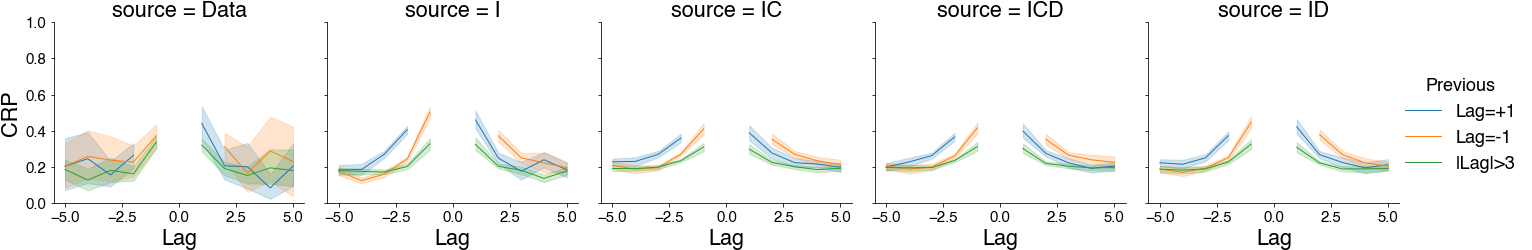

In [31]:
g = fr.plot_lag_crp(
    summed, lag_key='current', hue='Previous', col='source', height=4
).add_legend()
g.savefig(fig_dir / 'lag_crp_compound_icd.pdf');

In [32]:
%load_ext watermark
%watermark -v -iv

Python implementation: CPython
Python version       : 3.8.8
IPython version      : 7.23.1

mindstorm : 0.8.1
seaborn   : 0.11.2
numpy     : 1.21.4
psifr     : 0.8.0
cymr      : 0.10.8
matplotlib: 3.4.3

